<a href="https://colab.research.google.com/github/shaolinxx/shaolinxx-retail/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("census/retail-and-retailers-sales-time-series-collection")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/retail-and-retailers-sales-time-series-collection


In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
dataset_path = "/root/.cache/kagglehub/datasets/census/retail-and-retailers-sales-time-series-collection/versions/49"

print(os.listdir(dataset_path))

file_path = os.path.join(dataset_path, 'MRTSSM4541USS.csv')  # Dosya adını değiştirmelisin
df = pd.read_csv(file_path)

print(df.head())


['MRTSSM4541USS.csv', 'retail-sales-hobby-toy-and-game-stores_metadata.json', 'retail-sales-used-car-dealers_metadata.json', 'RETAILSMNSA.csv', 'MRTSSM442USN.csv', 'retailers-sales_metadata_2.json', 'retailers-sales_metadata_3.json', 'retail-sales-clothing-and-clothing-accessory-stores_metadata.json', 'MRTSSM442USS.csv', 'MRTSSM4413USS.csv', 'MRTSSM7221USN.csv', 'retailers-inventories_metadata.json', 'MRTSSM44000USS.csv', 'MRTSSM44X72USS.csv', 'retail-sales-furniture-and-home-furnishings-stores_metadata_1.json', 'retailers-inventories-to-sales-ratio_metadata.json', 'MRTSSM44112USN.csv', 'retailers-sales_metadata_1.json', 'retail-sales-clothing-stores_metadata.json', 'retailers-sales_metadata.json', 'MRTSMPCSM4400CUSN.csv', 'retail-sales-full-service-restaurants_metadata.json', 'RETAILIMSA.csv', 'retail-sales-electronic-shopping-and-mail-order-houses_metadata.json', 'MRTSSM4453USN.csv', 'retail-sales-pharmacies-and-drug-stores_metadata.json', 'retail-sales-automotive-parts-accessories-a

date
1992-01-01    2668
1992-02-01    2632
1992-03-01    2477
1992-04-01    2757
1992-05-01    2874
Name: value, dtype: int64


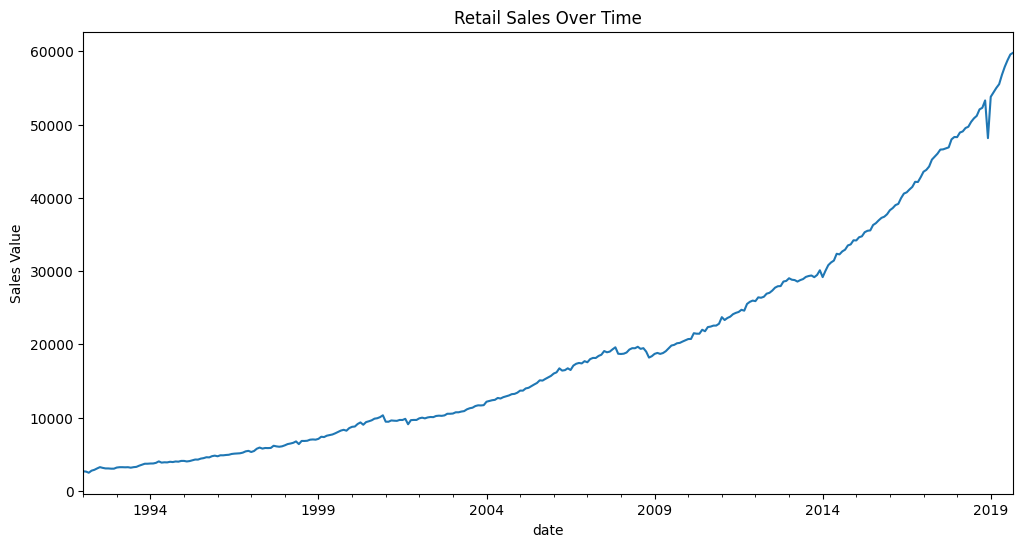

In [22]:
df['date'] = pd.to_datetime(df['date'])

# Tarihi indeks olarak ayarla
df.set_index('date', inplace=True)

# Sadece 'value' sütunuyla çalış
ts = df['value']

print(ts.head())

ts.plot(figsize=(12,6), title='Retail Sales Over Time')
plt.ylabel('Sales Value')
plt.show()


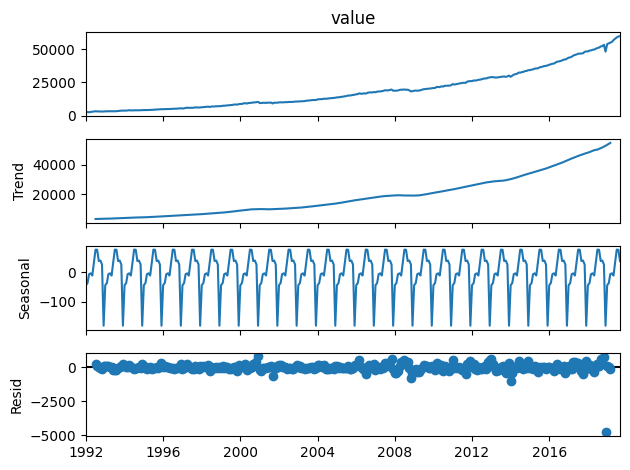

In [23]:
import statsmodels.api as sm

# Zaman serisini aylık olarak ayır (yıllık, aylık, vb.)
decomposition = sm.tsa.seasonal_decompose(df['value'], model='additive', period=12)

# Sonuçları görselleştir
decomposition.plot()
plt.show()


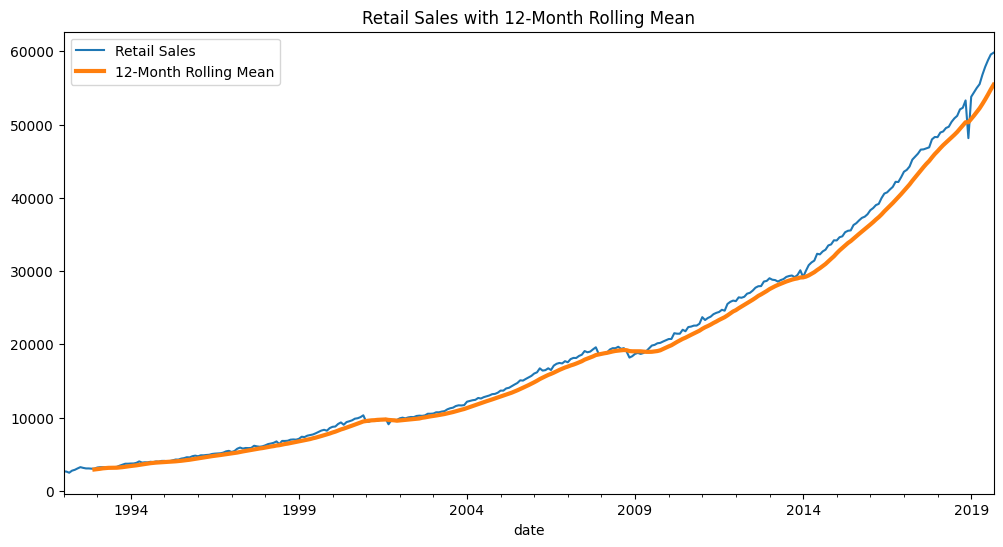

In [24]:
# 12 aylık hareketli ortalama
rolling_mean = df['value'].rolling(window=12).mean()

# Grafikte göster
df['value'].plot(figsize=(12,6), label='Retail Sales')
rolling_mean.plot(label='12-Month Rolling Mean', linewidth=3)
plt.legend()
plt.title('Retail Sales with 12-Month Rolling Mean')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-10-31aed286fde8>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')


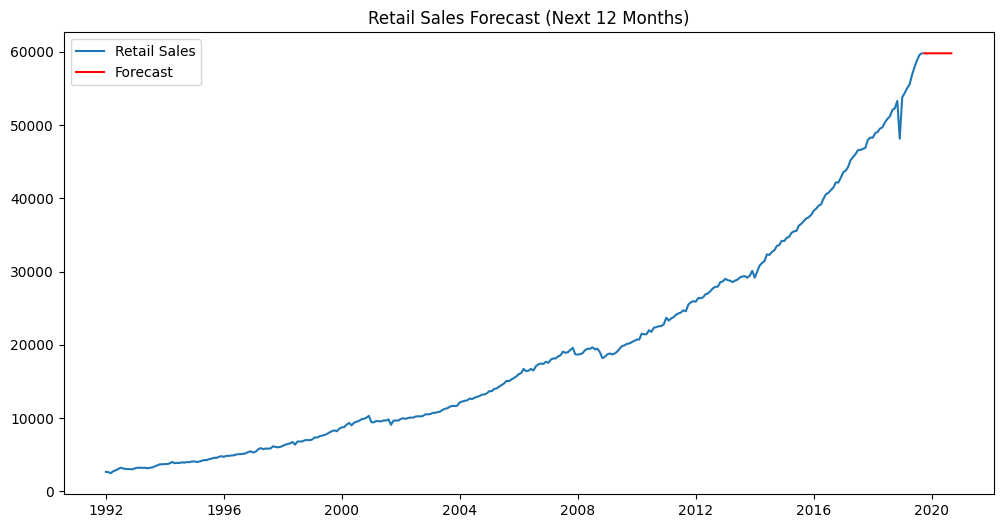

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini oluştur
model = ARIMA(df['value'], order=(1, 1, 1))  # (p,d,q) parametreleri

# Modeli fit et
model_fit = model.fit()

# Tahmin yap
forecast = model_fit.forecast(steps=12)  # Önümüzdeki 12 ay için tahmin

# Tahminleri grafikte göster
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Retail Sales')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.legend()
plt.title('Retail Sales Forecast (Next 12 Months)')
plt.show()


In [25]:
!pip install prophet


In [26]:
from prophet import Prophet

In [28]:
# Sadece 'date' ve 'value' sütunlarını seçiyoruz
df_prophet = df[['date', 'value']]

# 'date' sütununu 'ds' ve 'value' sütununu 'y' olarak yeniden adlandırıyoruz
df_prophet.columns = ['ds', 'y']

# Prophet'e uygun formata dönüştürülmüş veriyi inceleyelim
print(df_prophet.head())


NameError: name 'date' is not defined

In [ ]:
# Veri formatını Prophet'e uygun hale getirmek
df_prophet = df.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet, 'ds' (tarih) ve 'y' (değer) sütunlarını kullanır

# Modeli oluştur ve eğit
model = Prophet()
model.fit(df_prophet)

# Gelecek 12 ayı tahmin et
future = model.make_future_dataframe(df_prophet, periods=12, freq='M')
forecast = model.predict(future)

# Tahminleri görselleştir
model.plot(forecast)
plt.title('Retail Sales Forecast using Prophet')
plt.show()